In [0]:
import pandas as pd
from sklearn import datasets
from sklearn.utils import Bunch

In [0]:
boston = datasets.load_boston()
type(boston)

sklearn.utils.Bunch

In [0]:
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0  0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1  0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2  0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3  0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4  0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33

[5 rows x 13 columns]


In [0]:
boston['target'].shape

(506,)

In [0]:
df['MEDV'] = boston['target']

In [0]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
#Distinguish 'target' from 'feature' by bringing it upfront 
t = df['MEDV']
del df['MEDV']
df = pd.concat((t,df), axis=1)
print(df.head(2))
print(df.tail(2))

   MEDV     CRIM    ZN  INDUS  CHAS  ...  RAD    TAX  PTRATIO      B  LSTAT
0  24.0  0.00632  18.0   2.31   0.0  ...  1.0  296.0     15.3  396.9   4.98
1  21.6  0.02731   0.0   7.07   0.0  ...  2.0  242.0     17.8  396.9   9.14

[2 rows x 14 columns]
     MEDV     CRIM   ZN  INDUS  CHAS  ...  RAD    TAX  PTRATIO       B  LSTAT
504  22.0  0.10959  0.0  11.93   0.0  ...  1.0  273.0     21.0  393.45   6.48
505  11.9  0.04741  0.0  11.93   0.0  ...  1.0  273.0     21.0  396.90   7.88

[2 rows x 14 columns]


In [0]:
print(df.dtypes)

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object


In [0]:
df.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [0]:
for col in ['ZN', 'NOX', 'RAD', 'PTRATIO', 'B']:
  del df[col]

In [0]:
df.head()

,MEDV,CRIM,INDUS,CHAS,RM,AGE,DIS,TAX,LSTAT
0,24.0,0.00632,2.31,0.0,6.575,65.2,4.0900,296.0,4.98
1,21.6,0.02731,7.07,0.0,6.421,78.9,4.9671,242.0,9.14
2,34.7,0.02729,7.07,0.0,7.185,61.1,4.9671,242.0,4.03
3,33.4,0.03237,2.18,0.0,6.998,45.8,6.0622,222.0,2.94
4,36.2,0.06905,2.18,0.0,7.147,54.2,6.0622,222.0,5.33


In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEDV,506.0,22.532806,9.197104,5.00000,17.025000,21.20000,25.000000,50.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700


In [0]:
cols = ['RM', 'AGE', 'TAX', 'LSTAT', 'MEDV']
df[cols].head()

,RM,AGE,TAX,LSTAT,MEDV
0,6.575,65.2,296.0,4.98,24.0
1,6.421,78.9,242.0,9.14,21.6
2,7.185,61.1,242.0,4.03,34.7
3,6.998,45.8,222.0,2.94,33.4
4,7.147,54.2,222.0,5.33,36.2


In [0]:
df[cols].corr()

,RM,AGE,TAX,LSTAT,MEDV
RM,1.000000,-0.240265,-0.292048,-0.613808,0.695360
AGE,-0.240265,1.000000,0.506456,0.602339,-0.376955
TAX,-0.292048,0.506456,1.000000,0.543993,-0.468536
LSTAT,-0.613808,0.602339,0.543993,1.000000,-0.737663
MEDV,0.695360,-0.376955,-0.468536,-0.737663,1.000000


![](https://learning.oreilly.com/library/view/applied-deep-learning/9781789804744/assets/5b4bb01f-65bd-43a9-9a0b-8be9fffee1ea.png)

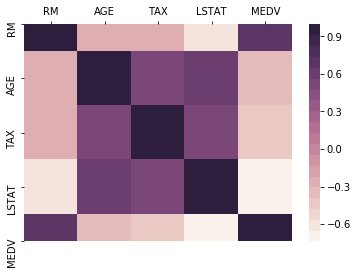

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ax = sns.heatmap(df[cols].corr(),
cmap = sns.cubehelix_palette(20, light=0.95, dark=0.15))
ax.xaxis.tick_top()

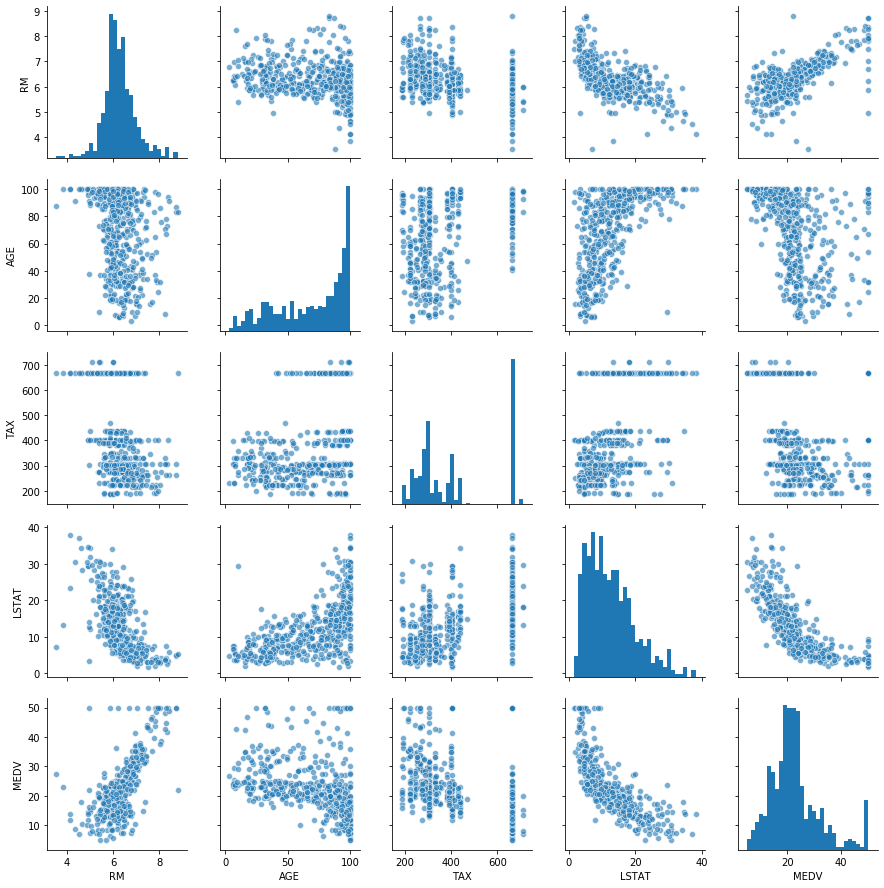

In [0]:
sns.pairplot(df[cols],plot_kws={'alpha':0.6},diag_kws={'bins':30})